In [146]:
'''
CS6140 Assignment 3
Q3 Understanding Random Forest Classifier
Wing Man, Kwok
7 Jul 2022
'''

'\nCS6140 Assignment 3\nQ3 Understanding Random Forest Classifier\nWing Man, Kwok\n7 Jul 2022\n'

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_digits                                #load mnist dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics                                             #compute accuracy score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, average_precision_score, average_precision_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, RepeatedStratifiedKFold      #to cross validate with k fold
from sklearn.model_selection import cross_val_score                     #to compute k fold prediction performance
from sklearn.metrics import make_scorer                                 #to compute k fold prediction performance

In [148]:
#Q3.1
#to baseline default random forest classifier prediction accuracy and classification report for MNIST Digits Dataset 

def print_q3_1_performance(y_test, y_pred):
  print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred), "\n")
  print("Classification Report of Baseline, MNIST Digits:")
  print(classification_report(y_test, y_pred))
  print("Confusion Matrix:")
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [149]:
#Q3.2 
#to print out resulted performance according to different parameters

def print_performance(clf, y_test, y_pred, X_train, y_train, X_test):

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print("Random Forest Classifier Parameters:")
  print(clf.get_params())
  print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
  print("precision", precision_score(y_test, y_pred, average='weighted'))
  print('Recall: %.3f' % recall_score(y_test, y_pred, average='weighted'))
  print("f1_score", f1_score(y_test, y_pred, average='weighted'))
  print("\n")

In [150]:
#Q3.2 
#assign values of "cateory" column from value of accuracy
def assign_category(accuracy):        
    if 0 < accuracy < 0.6:
        result = "D"
    elif 0.6 < accuracy < 0.7:
        result = "C"
    elif 0.7 < accuracy < 0.8:
        result = "B"
    elif 0.8 < accuracy < 0.9:
        result = "A"
    else:
        result = "A+"
    return result

ACCURACY OF THE MODEL:  0.9833333333333333 

Classification Report of Baseline, MNIST Digits:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        41
           4       0.95      1.00      0.97        38
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.94      0.97      0.96        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Confusion Matrix:


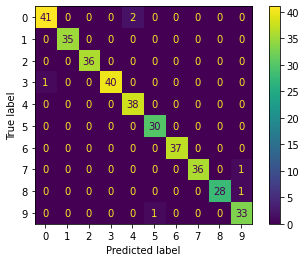

In [151]:
#Q3.1 Build a random forest classifier and find performance

digits = load_digits(as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.20, random_state = 1)

clf = RandomForestClassifier(random_state = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print_q3_1_performance(y_test, y_pred)

In [152]:
#Q3.2 Investigate Random Forest Classifier parameters

#---------- investigate random forest classifer parameters
#Performance of tunning parameters while keeping default parameter values
#train a classifer with number of nodes of trees
print("Table 1.  Performance of tunning parameters while keeping default parameter values")
clf = RandomForestClassifier(max_leaf_nodes = 6, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

#train a classifer with number of trees
clf = RandomForestClassifier(n_estimators = 200, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

#train a classifer with depth of trees
clf = RandomForestClassifier(max_depth = 1, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

#train a classifer with min samples to split
clf = RandomForestClassifier(min_samples_split = 5, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

#train a classifer with min samples in leaf
clf = RandomForestClassifier(min_samples_leaf = 5, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

Table 1.  Performance of tunning parameters while keeping default parameter values
Random Forest Classifier Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': 6, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
ACCURACY OF THE MODEL:  0.8805555555555555
precision 0.8864188711507579
Recall: 0.881
f1_score 0.8787352202021571


Random Forest Classifier Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'ran

In [153]:
#Performance of tunning parameters to plot parallel coordinates

print("Table 2.  Performance of tunning parameters while keeping default parameter values")

#train a classifer with number of nodes of trees
clf = RandomForestClassifier(max_leaf_nodes = 6, n_estimators = 100, max_depth = 1, min_samples_split = 2,  min_samples_leaf = 1, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

#train a classifer with number of trees
clf = RandomForestClassifier(max_leaf_nodes = 3, n_estimators = 200, max_depth = 1, min_samples_split = 2, min_samples_leaf = 1, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

#train a classifer with depth of trees
clf = RandomForestClassifier(max_leaf_nodes = 3, n_estimators = 100, max_depth = 5, min_samples_split = 2, min_samples_leaf = 1, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

#train a classifer with min samples to split
clf = RandomForestClassifier(max_leaf_nodes = 3, n_estimators = 100, max_depth = 1, min_samples_split = 5, min_samples_leaf = 1, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

#train a classifer with min samples in leaf
clf = RandomForestClassifier(max_leaf_nodes = 3, n_estimators = 100, max_depth = 1, min_samples_split = 2, min_samples_leaf = 5, random_state = 1)
print_performance(clf, y_test, y_pred, X_train, y_train, X_test)

Table 2.  Performance of tunning parameters while keeping default parameter values
Random Forest Classifier Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': 6, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
ACCURACY OF THE MODEL:  0.7694444444444445
precision 0.7834549023069252
Recall: 0.769
f1_score 0.7614687682198631


Random Forest Classifier Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': 3, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state

In [154]:
# ----------- Create a dataframe with the performance results
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS6140 Assignment3/assignment3 q3 performance matrix.csv")
df["category"] = df["accuracy"].apply(assign_category)
print("Table 3.  Accuracy category with default unlimited parameters", "\n")
print(df)
print("\n")

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS6140 Assignment3/assignment3 q3 performance matrix 2.csv")
df["category"] = df["accuracy"].apply(assign_category)
print("Table 4.  Accuracy category with non default parameters", "\n")
print(df)

Table 3.  Accuracy category with default unlimited parameters 

  max leaf node  n estimator  max depth  min samples split  min samples leaf  \
0             3          100  unlimited                  2                 1   
1     unlimited          200  unlimited                  2                 1   
2     unlimited          100          1                  2                 1   
3     unlimited          100  unlimited                  5                 1   
4     unlimited          100  unlimited                  2                 5   

   accuracy  precision  recall  f1_score category  
0     0.820      0.820   0.817  0.808679        A  
1     0.986      0.986   0.986  0.986000       A+  
2     0.769      0.783   0.769  0.761000        B  
3     0.980      0.980   0.980  0.980000       A+  
4     0.960      0.970   0.960  0.960000       A+  


Table 4.  Accuracy category with non default parameters 

   max leaf node  n estimator  max depth  min samples split  min samples leaf  \
0 

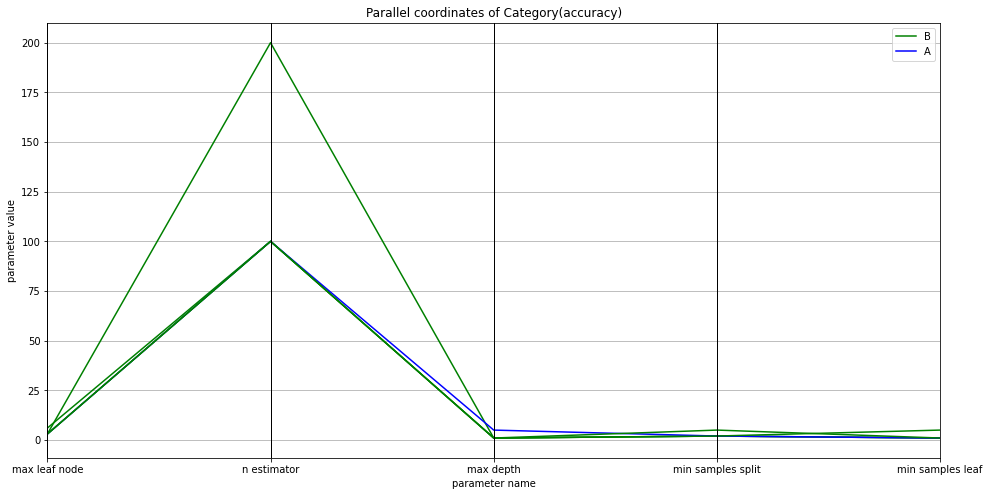

In [155]:
# plot parallel coordinates
df_t = df[["category", "max leaf node", "n estimator", "max depth", "min samples split", "min samples leaf"]]
plt.figure(figsize=(16,8))
plt.title("Parallel coordinates of Category(accuracy)")
plt.xlabel("parameter name")
plt.ylabel("parameter value")
pd.plotting.parallel_coordinates(df_t, 'category', color = ("green", "blue", "red"))

In [144]:
#---------------- Fine tune parameters using randomized search and grid search
# The paramater values are only suggestive. You can come up with better choices.
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 11, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

print("random_grid")
print(random_grid, "\n")

#Fine tune a classifer using randomized search
clf = RandomForestClassifier(random_state = 1)
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=1, n_jobs = -1)

print("Performance, randomized search, cv = none")
print_performance(clf_random, y_test, y_pred, X_train, y_train, X_test)

print("Randomized search, best parameters")
print(clf_random.best_params_, "\n")

#Fine tune a classifer using grid search

param_grid = {
    'max_depth': [680, 780],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [900, 1000]
}

clf = RandomForestClassifier(random_state = 1)
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs = -1, verbose = 2)

print("Performance, grid search, cv = none")
print_performance(grid_search, y_test, y_pred, X_train, y_train, X_test)

print("Grid search, best parameters")
print(grid_search.best_params_)

random_grid
{'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 8, 11, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]} 

Performance, randomized search, cv = none
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest Classifier Parameters:
{'cv': None, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 1, 'estimator__verbose': 0, 'estimator__warm_start': Fa

Analysis of the impace of each tuning parameter : 
<br><br>
I have produced 4 tables to compare tuning of parameters.  Table 1, 3, represents result of changing one parameter while keeping the rest <b>default</b>, then table 2, 4, shows the result of changing one parameter while putting a minimum value for the rest of the parameters to plot a mathematically meaningful parallel coordinates, without values of unlimited.
<br><br>
The result of keeping other parameters as default, i think is more reasonable, as any values i put as a minimum, could be a very general assumption.
<br><br>
Therefore, from table 3, it shows the decrease of number of max leaf node and max depth, decreased performance.
<br><br>
From table 4, we can observe the increase in depth could improve performance.

In [145]:
#Q3.3 Find the best estimator again and evaluate with 10 fold cross validation

#from sklearn.metrics import SCORERS
#print(sorted(SCORERS.keys()))

#train a classifer with min samples in leaf
cv = RepeatedStratifiedKFold(n_splits=10, random_state=1)
clf = RandomForestClassifier(max_depth = 680, max_features = 2, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 900, random_state = 1)

accuracy_score = cross_val_score(clf, digits.data, digits.target, cv=cv, scoring='accuracy')
print("accuracy_score", accuracy_score.mean())

scoring = {'f1_score' : make_scorer(f1_score, average='weighted')}
f1_weighted_scores = cross_val_score(clf, digits.data, digits.target, scoring='f1_weighted', cv=10, n_jobs=-1, error_score='raise')
print("f1_weighted_scores", f1_weighted_scores.mean())

accuracy_score 0.9753507138423337
f1_weighted_scores 0.9525623693342136


4.Hyper parameters avaliable to random forest classifer could be over 10 parameters.  If we reach the best parameters by brute force, it could take prior knowledge of the behavior.

Randomized search, however, select randomly to sample a wide range of values, and also in the combination of different values to narrow down the range of hyperparameters.

Now we have got the range of parameters, Grid search is to explicitly specify settings to try, to locate a more precise values of parameters.
<br><br>
5.To measure and analysis if high in accuracy is due to overfitting, by comparing training dataset accuracy with testing dataset for example.  If accuracy of training dataset is high but testing dataset is low, it means the model is overfit with training dataset and not generalising unseen data well.
<br><br>
6.Increasing maximum features could generally improve performance as there are more options to classify.

Then the number of trees, n_estimators, determines the maximum votings or averages of predictions.  Therefore it could improve prediction performane.

Maximum depth describe the longest path between root node and leaf node.  As there are more decisions to make before reaching the leaf node, the increase of tree depth could generally improve prediction performance.

Increasing number of minimum samples split, could help splitting to stop early, so decision tress would less likely becomes overfit.

Minimum samples leaf specifies the minimum amount of samples that must exist in a node after getting split.  Thus increasing the number helps reducing overfitting when number of data points becomes too little, but increasing too much would lead to underfit.